In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.ar_model import AR








1   -1.630004
2   -3.850006
3    6.840011
4    3.599991
5    5.699997
Name: Close, dtype: float64


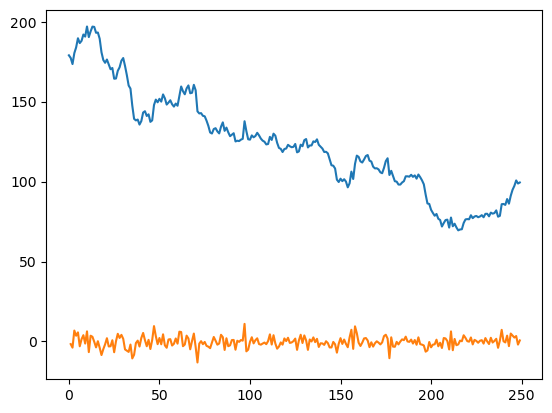

In [129]:

df = pd.read_csv('MRNA.csv')
#print(df.head())
plt.plot(df['Close'])


# This is how the Videos made the Data Stationary(Or close to stationary)
modified_Close = df['Close'] - df['Close'].shift(1)
modified_Close = modified_Close.dropna()
print(modified_Close.head())
plt.plot(modified_Close)



In [130]:
missing_values = df['Close'].isnull().sum()
missing_values_2 = modified_Close.isnull().sum()
# No missing values, nice!

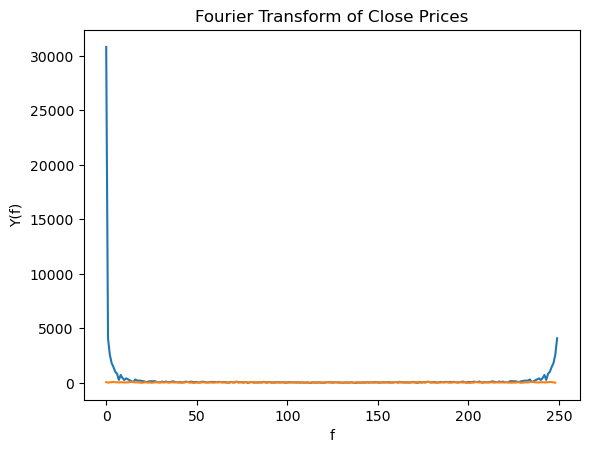

In [131]:
fourier_transform = np.fft.fft(df['Close'])
fourier_transform_2 = np.fft.fft(modified_Close)
plt.plot(np.abs(fourier_transform))
plt.plot(np.abs(fourier_transform_2))
plt.xlabel('f')
plt.ylabel('Y(f)')
plt.title('Fourier Transform of Close Prices')
plt.show()

### The Interpretation
The Modified Close does not give any major peaks in the Fourier Transform which is a sign that the fluctuating components are very less, this suggests that the modified Close is having stationarity, further tests will further test this property

### ACF or Autocorellation function
This lags the data by a certain amout and finds out the correlation between the distributions thus formed and the current distribution

### PACF or Partial Autocorellation function
This is mathematically defined as the corellation of xt and xt-n with respect to the variables xt-1, xt-2 .... xt-n+1, here the lag is set to 30 which means the PACF of lag 1....30 will be plotted

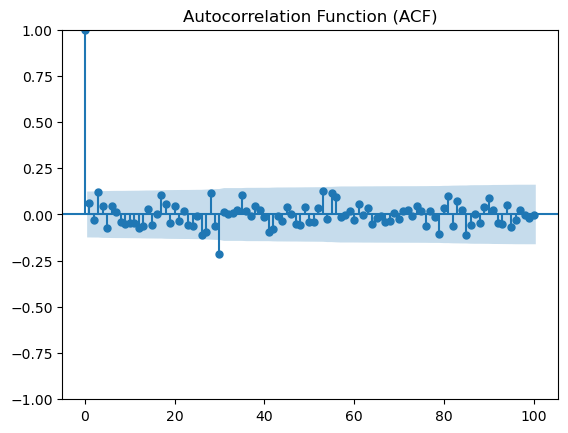

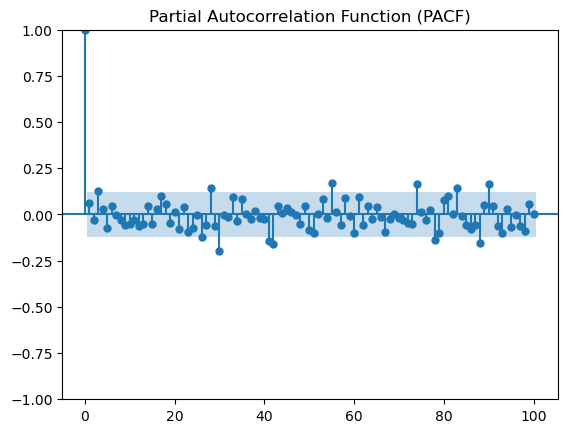

In [153]:
plot_acf(modified_Close, lags=100)
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF
plot_pacf(modified_Close, lags=100)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()




In [133]:

result = adfuller(modified_Close)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -7.891508857714513
p-value: 4.423736565471732e-12
Critical Values:
	1%: -3.457215237265747
	5%: -2.873361841566324
	10%: -2.5730700760129555


#### these plots suggest that q = 3, p = 3, and d = 0 the Null hypothesis of non stationarity can be strongly rejected

c:\Users\moond\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\moond\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\moond\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\moond\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\moond\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be give

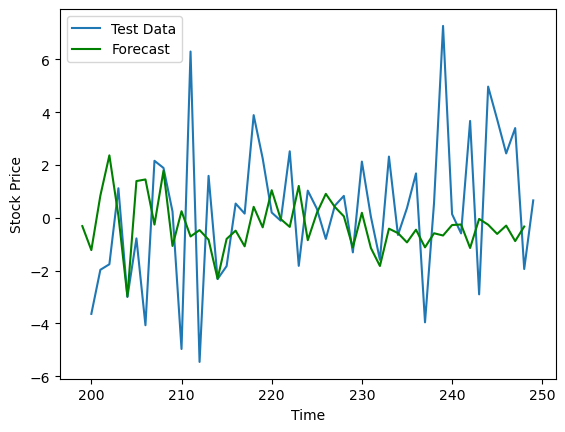

In [154]:
p = 30
d = 0
q = 5
train_size = int(len(modified_Close) * 0.80)
train, test = modified_Close[:train_size], modified_Close[train_size:]

# Fit ARIMA model on the training data
model = ARIMA(train, order=(p, d, q))
fitted_model = model.fit()

forecast = fitted_model.forecast(steps=len(test))

# Plotting the original test data and the forecasted values
plt.plot(test, label='Test Data')
plt.plot(forecast, color='green', label='Forecast')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()



c:\Users\moond\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\moond\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\moond\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\moond\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\moond\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results 

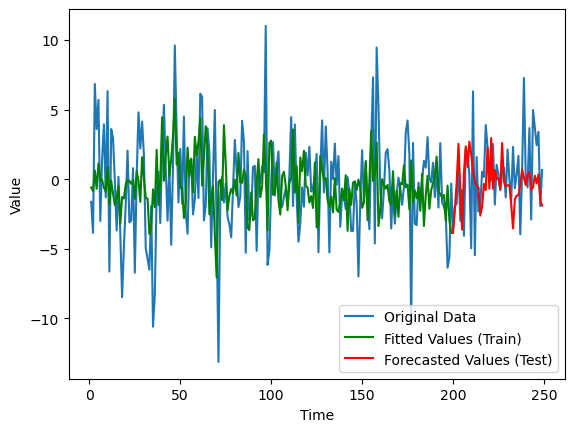

In [155]:
# import pandas as pd
# from statsmodels.tsa.arima.model import ARIMA
# import matplotlib.pyplot as plt
# # Fit AR model
# model = ARIMA(modified_Close, order=(5, 0, 0))  # AR order = 1, differencing = 0, MA order = 0
# fitted_model = model.fit()

# # Forecast next values
# forecast = fitted_model.forecast(steps=5)  # Forecast the next 5 steps

# # Plotting original data and forecasted values
# plt.plot(modified_Close, label='Original Data')
# plt.plot(range(len(modified_Close), len(modified_Close) + len(forecast)), forecast, color='red', label='Forecasted Values')
# plt.xlabel('Time')
# plt.ylabel('Value')
# plt.legend()
# plt.show()


split_index = int(len(modified_Close) * 0.8)
train_data = modified_Close[:split_index]
test_data = modified_Close[split_index:]
model = ARIMA(train_data, order=(50, 0, 0))  
fitted_model = model.fit()

forecast = fitted_model.forecast(steps=len(test_data))

# Plotting original data, forecasted values, and test set
plt.plot(modified_Close, label='Original Data')
plt.plot(train_data.index, fitted_model.predict(start=train_data.index[0], end=train_data.index[-1]), color='green', label='Fitted Values (Train)')
plt.plot(test_data.index, forecast, color='red', label='Forecasted Values (Test)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# fitted_model.params




#### There seems to ba a sesonal component to the data as values increase considerably in certain regions, so lets try SARIMA as well, to see if it is a better fit